<a href="https://colab.research.google.com/github/sirakik/japan_graph/blob/master/%E5%A4%A9%E5%9C%B0%E5%89%B5%E9%80%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

地球には国境などどこにもない

---



In [2]:
pip install dgl \
pip install networkx

In [3]:
import csv
import numpy as np
import dgl
import networkx as nx
import matplotlib.pyplot as plt

Using backend: pytorch


#WORLDデータ整形

---



SEKAI_DATA.ipynbでworld.csvを作成済み

In [4]:
!wget -q https://raw.githubusercontent.com/sirakik/japan_graph/master/the_creation/world.csv -O world.csv
with open('world.csv') as f:
    reader = csv.reader(f)
    world = [row for row in reader]

print(len(world))

194


##※注意


world.csvには**194ヶ国**のデータがある.  

当初は,  
- 国連加盟国(193ヶ国) + バチカン市国 = 194ヶ国  

だと思っていたが, コソボのデータがある.(バチカンのデータもある)  
※コソボは国連に加盟していない(ロシアの反対により加盟できない)


つまり,  
- 国連加盟国(192ヶ国) + バチカン市国 + コソボ = 194ヶ国  

になる.


実際にデータを使う際は,
失われた国連加盟国を探す必要があります．

##国名と首都の緯度経度を辞書型へ

In [5]:
num_country = len(world)

world_dict = {}
capital_dict = {}
for i, row in enumerate(world):
    world_dict[i] = row[0]
    capital_dict[i] = (float(row[3]), float(row[2]))

print(world_dict)
print(capital_dict)

{0: 'Iceland', 1: 'Ireland', 2: 'Azerbaijan', 3: 'Afghanistan', 4: 'United States', 5: 'United Arab Emirates', 6: 'Algeria', 7: 'Argentina', 8: 'Albania', 9: 'Armenia', 10: 'Angola', 11: 'Antigua and Barbuda', 12: 'Andorra', 13: 'Yemen', 14: 'United Kingdom', 15: 'Israel', 16: 'Italy', 17: 'Iraq', 18: 'Iran', 19: 'India', 20: 'Indonesia', 21: 'Uganda', 22: 'Ukraine', 23: 'Uzbekistan', 24: 'Uruguay', 25: 'Ecuador', 26: 'Egypt', 27: 'Estonia', 28: 'Ethiopia', 29: 'Eritrea', 30: 'El Salvador', 31: 'Australia', 32: 'Austria', 33: 'Oman', 34: 'Netherlands', 35: 'Ghana', 36: 'Cape Verde', 37: 'Guyana', 38: 'Kazakhstan', 39: 'Qatar', 40: 'Canada', 41: 'Gabon', 42: 'Cameroon', 43: 'Gambia', 44: 'Cambodia', 45: 'Guinea', 46: 'Guinea-Bissau', 47: 'Cyprus', 48: 'Cuba', 49: 'Greece', 50: 'Kiribati', 51: 'Kyrgyzstan', 52: 'Guatemala', 53: 'Kuwait', 54: 'Georgia', 55: 'Grenada', 56: 'Croatia', 57: 'Kenya', 58: "Côte d'Ivoire", 59: 'Costa Rica', 60: 'Kosovo', 61: 'Comoros', 62: 'Colombia', 63: 'Congo

In [6]:
# 国名を番号に変換
def find_key(value): 
    for k, v in world_dict.items():
        if value == v:
          return k

##国境エッジ

In [7]:
border_edges = []
for row in world:
    src = find_key(row[0])
    for nei in row[4:]:
        dct = find_key(nei)
        border_edges.append((src, dct))

print(border_edges)
print('国境エッジ数: ', len(border_edges))

# ループエッジ
roop_edges = [(i, i) for i in range(num_country)]

[(1, 14), (2, 18), (2, 54), (2, 9), (2, 193), (3, 18), (3, 23), (3, 96), (3, 101), (3, 112), (3, 126), (4, 40), (4, 171), (5, 33), (5, 39), (5, 65), (6, 102), (6, 119), (6, 165), (6, 173), (6, 178), (6, 185), (7, 24), (7, 104), (7, 133), (7, 158), (7, 142), (8, 49), (8, 60), (8, 162), (8, 180), (9, 18), (9, 2), (9, 54), (9, 113), (10, 63), (10, 63), (10, 68), (10, 117), (12, 79), (12, 143), (13, 33), (13, 65), (14, 1), (14, 47), (14, 79), (15, 26), (15, 73), (15, 181), (15, 192), (16, 32), (16, 69), (16, 76), (16, 83), (16, 127), (16, 143), (17, 18), (17, 53), (17, 65), (17, 73), (17, 113), (17, 181), (18, 2), (18, 3), (18, 9), (18, 17), (18, 112), (18, 113), (18, 126), (19, 101), (19, 136), (19, 141), (19, 122), (19, 170), (20, 137), (20, 131), (20, 167), (21, 57), (21, 63), (21, 78), (21, 97), (21, 190), (22, 82), (22, 135), (22, 151), (22, 155), (22, 177), (22, 188), (22, 193), (23, 3), (23, 38), (23, 51), (23, 96), (23, 112), (24, 7), (24, 142), (25, 62), (25, 153), (26, 15), (26, 

#天地創造


---



/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


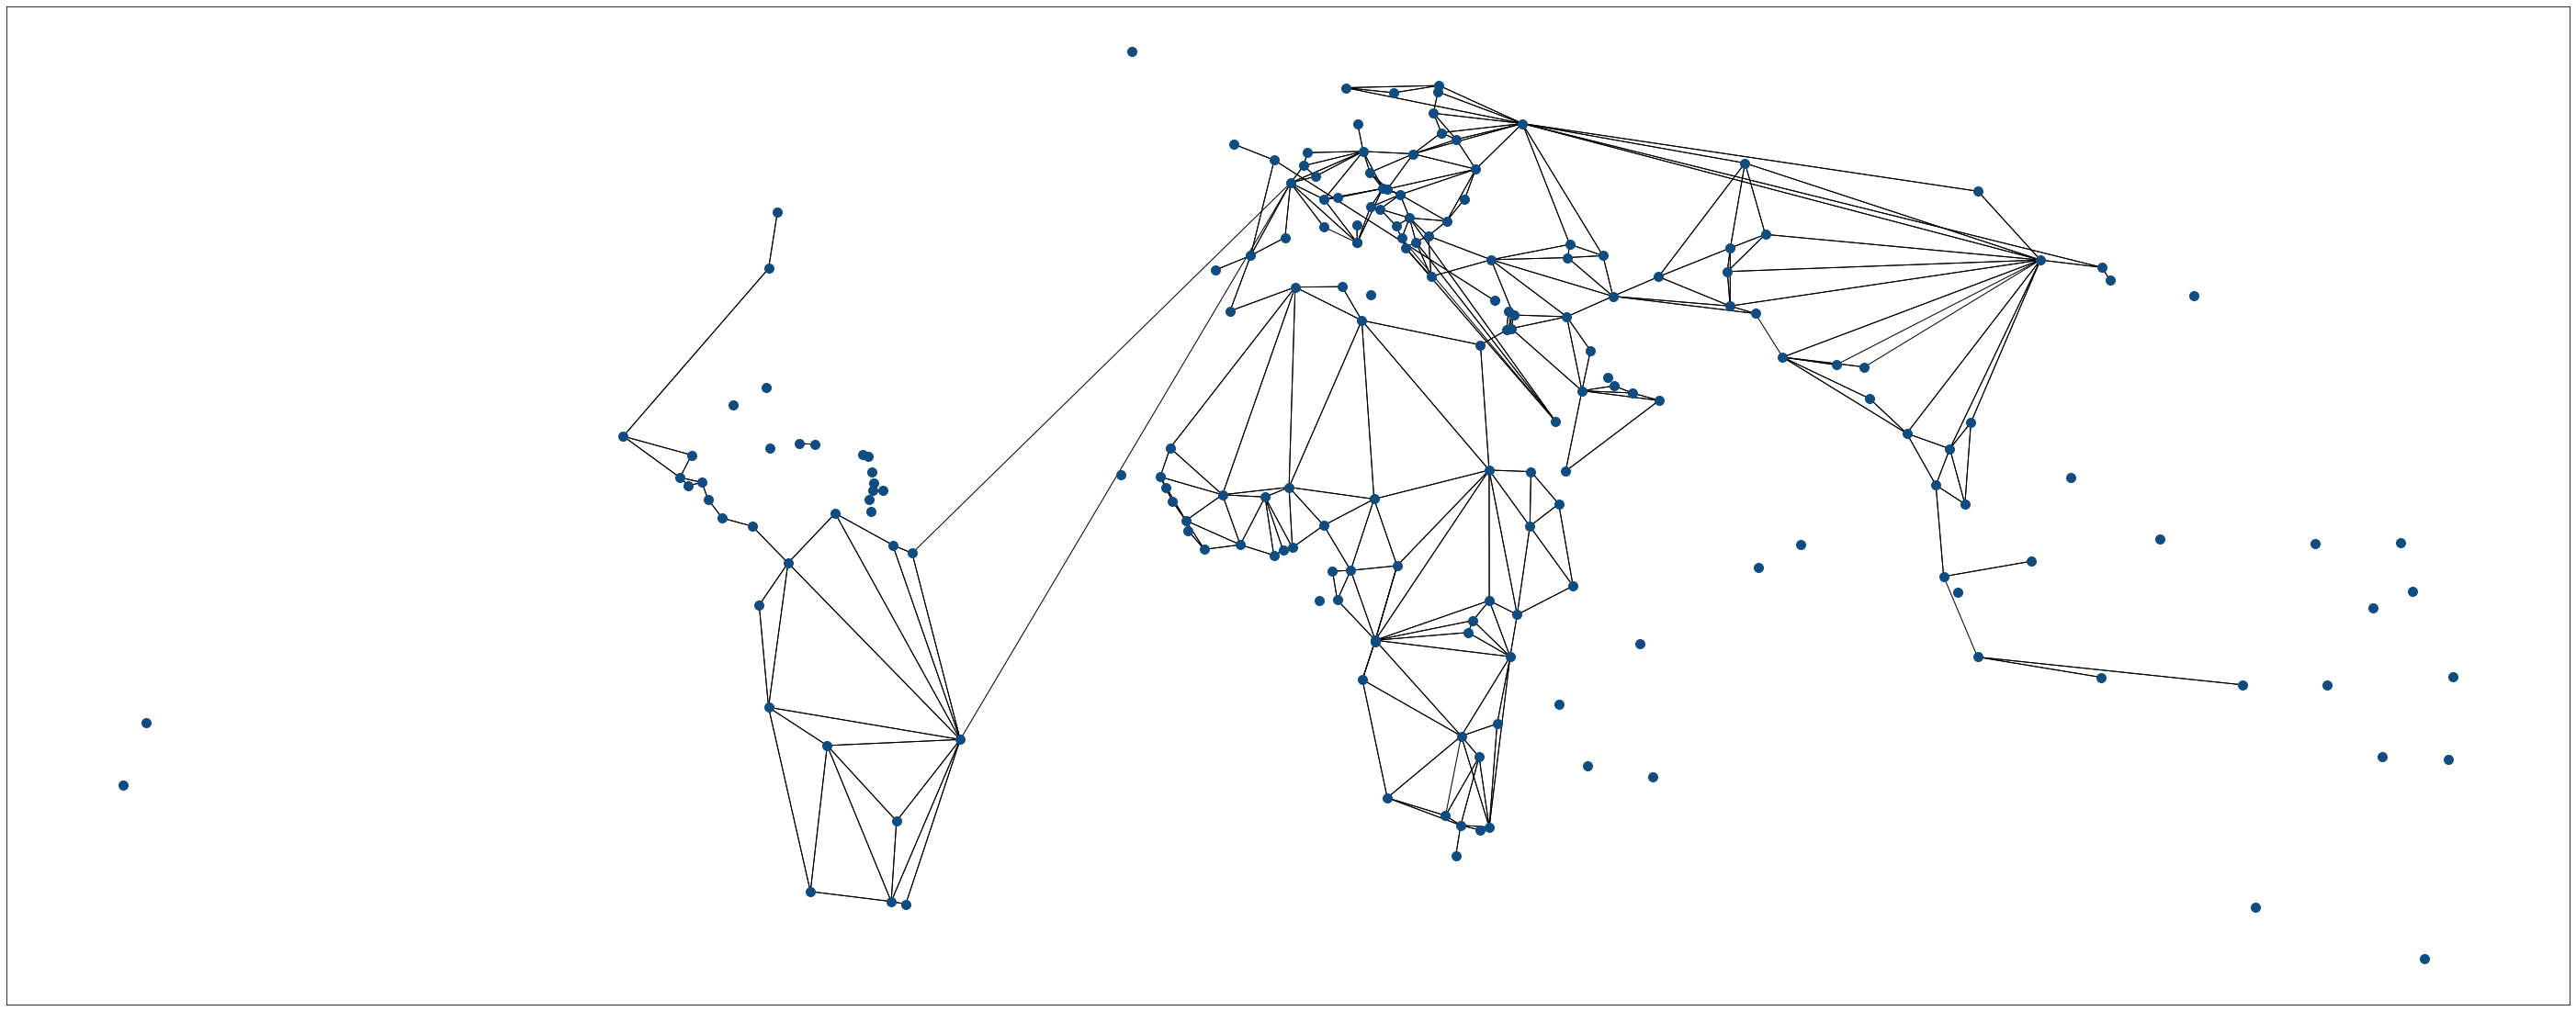

In [8]:
# 世界グラフ宣言
world_g = dgl.DGLGraph()
world_g.add_nodes(num_country)

# 国境エッジ
src, dst = tuple(zip(*border_edges))
world_g.add_edges(src, dst)

# ループエッジ
src, dst = tuple(zip(*roop_edges))
world_g.add_edges(src, dst)

# 描画
plt.rcParams['figure.figsize'] = (50.0, 20.0)
nx_world_g = world_g.to_networkx()
nx.draw_networkx(nx_world_g, pos=capital_dict, arrows=False, node_size=100, with_labels=False, labels=world_dict, node_color='#0F4C81', edge_color='#000000')
plt.show()

###とりあえず見づらいので，色々と整形

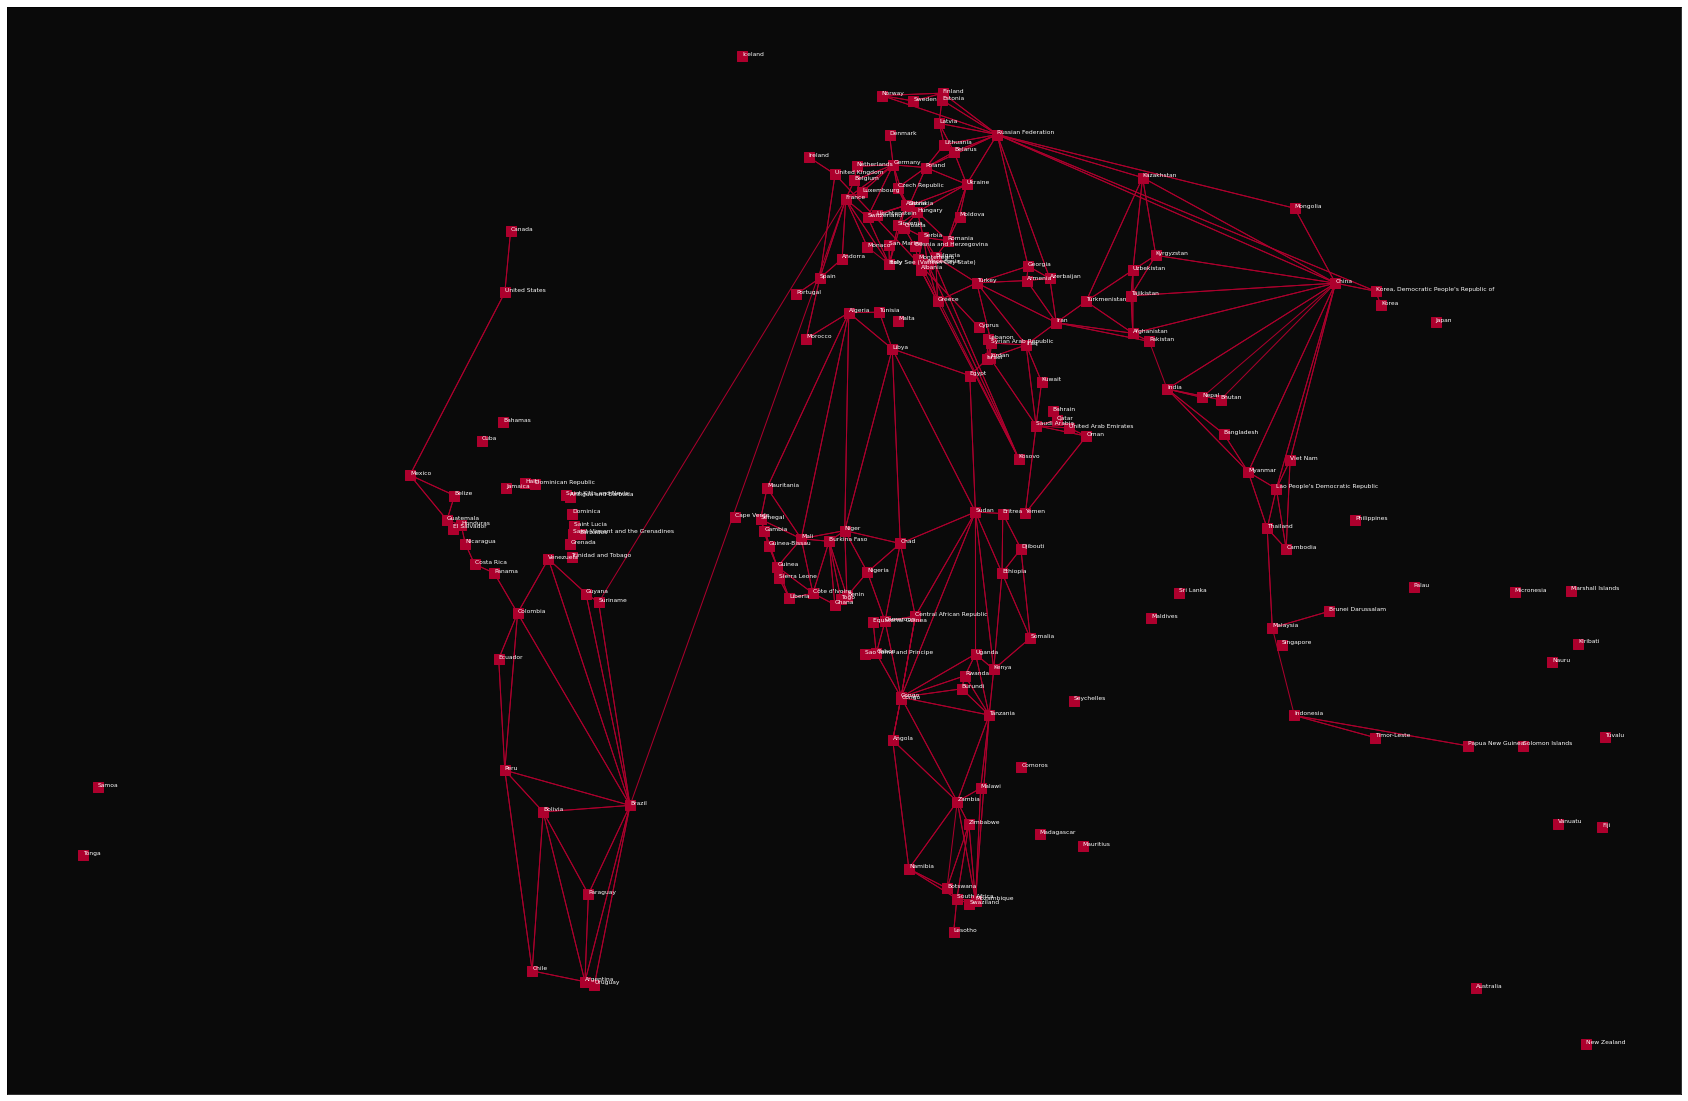

In [48]:
# 描画
plt.rcParams['figure.figsize'] = (30.0, 20.0)
fig, ax = plt.subplots()
ax.set_facecolor('#0A0A0A')

nx_world_g = world_g.to_networkx()
nx.draw_networkx(nx_world_g, pos=capital_dict, arrows=False, node_size=100, with_labels=False, node_color='#AD002D', edge_color='#AD002D', node_shape='s')
nx.draw_networkx_labels(nx_world_g, pos=capital_dict, labels=world_dict, horizontalalignment='left', verticalalignment='bottom', font_color='#FFFFFF', font_size=6)
plt.show()